# Numerical Methods Week 3: Built-in Python ODE Solvers
### written by CRANE Co-leads

Reminder: [Code of conduct](https://docs.google.com/presentation/d/1UiBbQLGCZ_8VTTufJGitjnfz2Lj12TzAPuvHLvRLMhk/edit?usp=sharing)



---

Welcome back, students! Now that you know what Runge Kutta is and how to code it yourself, let's try using the built-in Python tools that utilize this method and others!

<br>

##**Goals**:

*   Writing Modular Code
*   Understanding Python library documentation
*   Learn how to use pre-built ordinary differential equation (ODE) solvers for faster and more accurate results

<br>


#Using built-in Python Functions to solve ordinary differential equations (ODE)

Let's use the SciPy library (scientific computing library) to solve an ordinary differential equation (ODE). We will mostly be using the [**`solve_ivp`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) function within SciPy, where "ivp" stands for **initial value problem**.

</br>

**An *initial value problem* is a problem where we know the equations of motion and the starting point for the system. This is a very common numerical problem in physics.** Python comes with a few ways to easily solve initial value problems, but here we'll use the `scipy.integrate.solve_ivp` function. `solve_ivp` allows us to choose from many numerical integrators and ODE solvers such as the [trapezoid method](https://en.wikipedia.org/wiki/Trapezoidal_rule) for integration, and higher order Runge Kutta methods (i.e. RK45).

<br>

**`solve_ivp`** is designed to solve equations of the form
&nbsp;

$$\begin{align}
\frac{dy}{dt} = f(t,y)
\end{align}$$

&nbsp;

where $y$ can be a vector of several variables, such as ($x$, $y$, $v_x$, $v_y$). When solving an initial value problem, we start with both an ODE (the equation above) and an initial data point (```t0```,```y0```) to solve from.

</br>

To solve, you need to write a function (```fun```)
, specify a time range to solve the equations over (a starting time (```t0```) and ending time (```tf```)), and pick the initial conditions ```y0``` (the values of y at ```t0```).

The below code imports the `solve_ivp` function, uses `solve_ivp` to get $y$, and then stores the solutions for $t$ and $y$ into two different arrays.

```
from scipy.integrate import solve_ivp
results = solve_ivp(fun, (t0, tf), y0, method='RK45')
t = results.t
y = results.y
```

Here, the last two lines have gotten arrays for the solution of t and y, and can be used to plot the results. `solve_ivp` returns the solutions to variable $t$ and $y$ into one variable `results`. To unpack these solutions, we use `t = results.t` for example. **Remember that y is usuall a vector, so it will be an array of multiple values.**

<br>

If your function has any extra arguments, you can include them using the `solve_ivp` ```args``` option.
```
#e.g. if your function (fun) has the arguments (t, y, A, B, C), initial condition (y0), and start/end times (t0 and tf), you could use
results = solve_ivp(fun, (t0, tf), y0, method='RK45', args=(A,B,C))
```
$\tag{0}$

The code is structured this way so you can apply it to any problem in a general way.To understand more about the options `solve_ivp` has, see the coding documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

Getting familiar with documentation like this is very important to using new python functions!


It is good to have underlying knowledge of the algorithms and tools you need to solve problems. This knowledge allows you to use these ready-to-use tools to their full extent. **These built-in functions have many more options and are capable of solving much more difficult problems but require you to know the lingo and understand the underlying mechanisms.** Now let's do an actual example!


<br>




#Lets get started solving a differential equation using ```solve_ivp```.


First, import ```solve_ivp``` and ```constants``` with our usual ```numpy``` and ```matplotlib```.

In [350]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import constants as CONSTANTS

##Project 1: Use SciPy `solve_ivp()` function to solve the driven-damped oscillator equation

A great example of a driven-damped harmonic oscillator is a child being pushed on a swing. Air resistance (drag) will slow them down, so to keep them going we drive them by pushing!

<p align="center">
  <img width="300" src="https://img1.picmix.com/output/stamp/normal/3/5/9/2/1572953_d54a8.gif">
</p>

The force F of in our driven-damped oscillator equation is:

$$\begin{align}
F &= -k\: ( x - x_{eq}) + \beta v + A\: cos(\omega t) \\
ma &=
\tag{1}
\end{align}$$

<br>

Where '$\beta$' is our drag term, and '$A\:cos(\omega t)$' is an oscillating driving force with amplitude '$A$' and frequency '$\omega$'.

<br>

To make this easier to solve, lets make this equation in terms of only x and t. Remember Newton's Law: $F=ma$, and that $a = dv/dt$. This gives us

<br>

$$\begin{align}
\frac{d v}{dt} = -\frac{k}{m}\: ( x - x_{eq}) + \frac{\beta}{m} v + \frac{A}{m}\: cos(\omega t)
\tag{2}
\end{align}$$

we also know

$$\begin{align}
\frac{d x}{dt} = v
\tag{3}
\end{align}$$

<br>

Click on the [**solve_ivp**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) link to documentation and read through how to use it. Use Google to find examples on how to run the function. As computational scientists, it is important for you to learn how to read documentation and practice your google skills in order to use new algorithms.

For example, googling "scipy solve_ivp examples" gives this link: https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations

<br>

<br>
<br>

Now, lets solve this problem using the 'RK45' method and the following constants:

$$k = 1.0$$

$$m = 1.0$$

$$x_{eq} = 1.0$$

$$\beta = -0.25$$

$$A = 2.0$$

$$\omega = 2.0$$


First, lets make a function for this damped driven oscillator equation, called `drivenf`. Use equations (2) and (3) to write `drivenf`. This is a function that will return $dx/dt$ and $dv/dt$ for a given time, position and velocity:

NOTE: solve_ivp requires that the variables for the function you're solving ($x$ and $v$) are packed together (into $X$). So the input to `drivenf`, $X$, contains both $x$ and $v$.

In [351]:
def drivenf(t, X):
  """ Function for damped driven oscillator equation. Returns array containing
  velocity (dx/dt) and acceleration (dv/dt), given time, position, and velocity inputs.
  Arguments:
    t - time
    X - array containing x and v
  """
  # constants
  k = 1
  m = 1
  xeq = 1
  beta = -0.25
  A = 2
  omega = 2

  # TODO: add code for our damped-driven oscillator equation
  dxdt = X[1]
  dvdt = -k/m * (X[0] - xeq) + beta/m * X[1] + A/m * np.cos(omega * t)

  return [dxdt,dvdt]

Now, with our `drivenf` function, lets use the RK45 option in `solve_ivp` to solve the initial value problem `(x0, v0)=(2.0, 0.0)`. Review the documentation for `solve_ivp` to understand how the function works: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

See Lecture Notes for Part 2c for a description of how to use this documentation, and Equation (0) for a summary of the arguments.

NOTE: Since the variables for `drivenf` ($x$ and $v$) are packed together (into X), we also need to pack the initial values for these variables together.  

In [352]:
# start and stop times
t0 = 0
tf = 40
tSteps = np.arange(t0, tf)

# initial values
x0 = 2.0
v0 = 0.0
#TODO: pack initial values together
X0 = [x0, v0]

#TODO: enter arguments in solve_ivp to solve the drivenf equation
sol = solve_ivp(drivenf, [t0,tf], X0, max_step=0.01)

plot your results

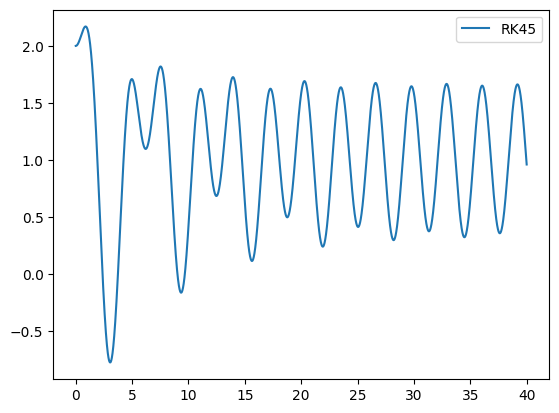

In [353]:
fig,ax = plt.subplots()
ax.plot(sol.t, sol.y[0], label = 'RK45')
plt.legend()
plt.show()

&nbsp;
&nbsp;
-------
#**PAUSE HERE AND TAKE A BREAK!**
-------

&nbsp;

##  Problem 2: Solve Kepler's problem using "Radau" in `solve_ivp()`

Another great example of a system to solve is an orbit! We will be proving Kepler's first law numerically at the end.

<p align="center">
  <img width="300" src="https://qph.cf2.quoracdn.net/main-qimg-c56f163dc353d14e09796cb150f2b695">
</p>

<br>

Let's consider two celestial bodies, maybe a star with a planet orbiting it. The force on a body of mass $m$ at distance $\boldsymbol{\mathrm{r}}$ from a body of mass $M$ at the origin is given by Newton's law

<br>
$$\begin{align}
\boldsymbol{\mathrm{F}}= -\frac{GMm}{\left|\boldsymbol{r}\right|^3}\vec{r}
\tag{4}
\end{align}$$

<br>

In two dimensions, where $\boldsymbol{\vec{r}}=x\boldsymbol{\hat{\imath}} + y \boldsymbol{\hat{\jmath}}$ and $|\boldsymbol{r}|=\sqrt{x^2 + y^2}$, the components of the acceleration $\boldsymbol{\mathrm{a}}=a_x \boldsymbol{\hat{\imath}} + a_y \boldsymbol{\hat{\jmath}}$ are given by

<br>

$$\begin{align}
 a_x = \frac{\mathrm{d}v_x}{\mathrm{d}t} = - \frac{GMx}{\left(x^2 + y^2\right)^{3/2}},\quad a_y = \frac{\mathrm{d}v_y}{\mathrm{d}t} = - \frac{GMy}{\left(x^2 + y^2\right)^{3/2}}
\tag{5}
\end{align}$$

<br>


As with the previous exercise, we have to provide the function with three arguments to work (see <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp">the documentation</a> for more). The first argument is a function $\boldsymbol{\mathrm{F}}(t,\boldsymbol{\mathrm{X}})$ which 'updates' the system, this is where the equations of motion are set. This function must take the time, and a *state vector* (for us, position and velocity), and then return the time derivative of the state vector's components. We'll call our state vector $\boldsymbol{\mathrm{X}}$, which just holds the current $x$ and $v$ of the planet. **This time, since we are interested in both the x and y coordinates, we will have two variables for each quantity we track**:

<br>
$$ \boldsymbol{\mathrm{X}} = \left(x, y, v_x, v_y\right) $$

<br>

So it follows that the function $\boldsymbol{\mathrm{F}}(t,\boldsymbol{\mathrm{X}})$ must return

$$ \boldsymbol{\mathrm{F}}(t,\boldsymbol{\mathrm{X}}) = \left(\: v_x(t), v_y(t), a_x(t), a_y(t) \: \right)$$

<br>

The first two components are simply the last two components in the input. The last two components can be calculated from the acceleration equations above. The other arguments that `scipy.integrate.solve_ivp` requires is the initial state of the system $\boldsymbol{\mathrm{X}}_0$ and the time span over which to solve the equations.

<br>

A few tips:
- You must set the <samp>method</samp> argument of <samp>solve_isp</samp> to <samp>"Radau"</samp> to get a stable solution.
- Set the aregument <samp>t_eval</samp> to an array of time coordinates and the function will find $\boldsymbol{\mathrm{X}}$ at those time coordinates.
- The output of solve_ivp is such that  $(x, y, v_x, v_y)$ values are stored in array at <samp>result.y</samp> for `result = solve_ivp(...)`

First let's setup the constants we’ll use throughout the problem. It’s best practice to name constants in ```ALL_CAPS```. In this context, we mean that constants are variables you would never change the value of. For example,  $\pi = 3.14$.

In [354]:
M_EARTH = 5.972E24   # Mass of the earth
M_SUN = 1.98847E30   # Mass of the sun

AU = CONSTANTS.astronomical_unit #Distance from the sun to the earth
PI = CONSTANTS.pi
GRAV = CONSTANTS.gravitational_constant
YEAR = CONSTANTS.year

<br>

To solve the problem numerically, let's start the solver with a body at $x=1\,AU= 1.5*10^{11}$ m, $y=0$ and an initial velocity $35 *10^3$ m/s in the positive $y$ direction. We will later plot the $x$ and $y$ values and you should see an elliptical orbit. Make sure you run the simulation over a sensible time-scale, e.g. a few years.

In [355]:
# Initial state vector for the planet
# X0 = (x0, y0, vx0, vy0)
X0 = np.array([AU, 0.0, 0.0, 35.0E3])

# Length of time to evaluate for in years
n_years = 22

# Time points at which to evaluate (using 100 points/year)
t0 = 0.0
tf = n_years *YEAR
t_eval = np.linspace(0.0, tf, int(n_years * 100))

### Task 1: Define function to calculate velocity and acceleration in an orbiting body using equation (5) above

In [356]:
def orbit_eqn(t, X):
  """ Solves for acceleration using Kepler's equations
    Arguments:
    t - time
    X - array containing x, y, vx, vy
  """
  # TODO: Get coordinates and velocity from input X
  x, y, vx, vy = X

  # TODO: Use equation (5) to calculate each component of acceleration
  dvxdt = -GRAV * M_SUN * x * (x **2 + y ** 2) ** (-3/2)
  dvydt = -GRAV * M_SUN * y * (x **2 + y ** 2) ** (-3/2)
  dxdt = vx
  dydt = vy

  return [dxdt, dydt, dvxdt, dvydt]

###Task 2: Use solve_ivp to solve the equations

Remember to use t_eval above, and set the method to 'Radau'

Show the difference in how the trajectory looks when solving the problem using **Radau** vs **RK45** after 10+ years

#### Why **Radau**? Why not RK45?

The **RK45** method is an **Explicit** method as mentioned in the documentation.

The **Radau** Method is an **Implicit** method as mentioned in the documentation.

Information on the differences can be found here: https://en.wikipedia.org/wiki/Explicit_and_implicit_methods

</br>

The main difference is that **Explicit** methods solve the next time step using the current or previous time steps in the Force function $\boldsymbol{\mathrm{F}}(t,\boldsymbol{\mathrm{X}})$ and the next (future) time step on the left-hand-side of the equation.

</br>

**Implicit** methods use the next (future) time step along with the the current or previous time steps in the Force function $\boldsymbol{\mathrm{F}}(t,\boldsymbol{\mathrm{X}})$.

</br>

This means that **Explicit** methods such as **RK45** are much easier and faster to solve (and code). However, their error will accumulate and become larger as time progresses because they are dependent on how accurate the previous steps' solution was. Therefore, the accuracy of your solution depends on how many and how small steps you take!

On the other hand, **Implicit** methods can be **unconditionally stable** allowing you get an accurate solution without dependence on how long the simulation is or how small the time steps are. However, they highly depend on the initial conditions and initial guess of the solution!

</br>

In [357]:
# TODO: Use solve_ivp to solve orbit_eqn using our initial conditions X0
solution = solve_ivp(orbit_eqn, [t0, tf], X0, t_eval=t_eval, method = "Radau")


# Get the solution arrays
x, y, vx, vy = solution.y

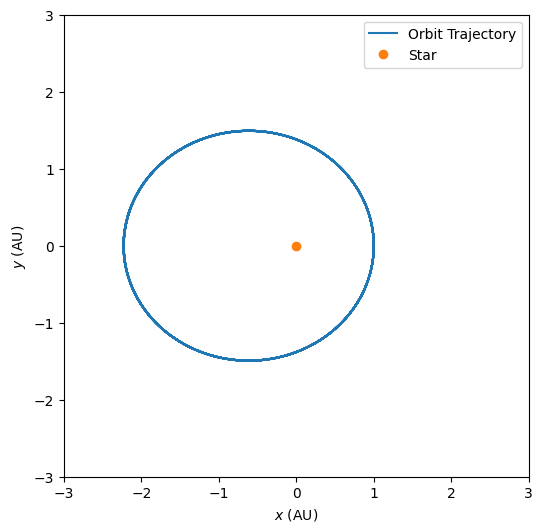

In [358]:
# Plot the orbit
fig, ax = plt.subplots(figsize=[6, 6])
ax.plot(x / AU, y / AU, label='Orbit Trajectory')

ax.plot([0.0], [0.0], 'o', label='Star')
ax.set(xlabel='$x$ (AU)', ylabel='$y$ (AU)', xlim=[-3, 3], ylim=[-3, 3])
ax.legend()
plt.savefig('./kepler_example_orbit.pdf')
plt.show()

##The lesson ends here! See below for an additional info and a practice problem.

##Extra: Kepler's First Law

Kepler's First Law states that

> All planets move in elliptical orbits, with the sun at one focus.

Now check if the orbit is elliptical. The equation of an ellipse is
$$ \frac{x^2}{a^2} + \frac{y^2}{b^2} = 1 $$
where $a$ and $b$ are the semi-minor and semi-major axes respectively. What are $a$ and $b$ for this orbit? The below figure shows what the orbit should look like.

<p align="center">
  <img width="400" src="https://cdn.shopify.com/s/files/1/0093/2298/7617/files/Screenshot_2024-01-05_at_12.24.32_PM_1024x1024.png?v=1704417889">
</p>

We will rearrange the above to something that looks like the equation for a straight line and fit to find $a$ and $b$. The $x$ and $y$ in the equation are centred  on the centre of the ellipse but our data is centred on the sun (the ellipse's focus). Make sure to shift your data (only necessary in $x$) to the centre.

To find $a$ and $b$ we need to fit to something that looks like a line $v=mu+c$. We rearrange to get $y^2=b^2−\frac{b^2}{a^2}x^2$,
so if we fit to $v=y^2$ and $u=x^2$ we′ll find $b=\sqrt{c}$ and $a=\sqrt{-c/m}$.
This is okay because $m$ is negative.

We must also shift the coordinates so that the origin is the centre of the ellipse, not the sun (the focus of the ellipse). We find the x coordinate of the centre by finding the x coordinate where y is maximum.

In [359]:
# Prepare the data
v = y ** 2
u = (x - x[np.argmax(y)]) ** 2

In [360]:
# Perform the fit
m, c = np.polyfit(u, v, 1)

In [361]:
# Getting a and b, in units of AU
print("a=%.2f AU, b=%.2f AU" % (np.sqrt(- c / m) / AU, np.sqrt(c) / AU))
a, b = np.sqrt(- c / m) / AU, np.sqrt(c) / AU

a=1.61 AU, b=1.49 AU


The elliptical orbit for the Kepler's law

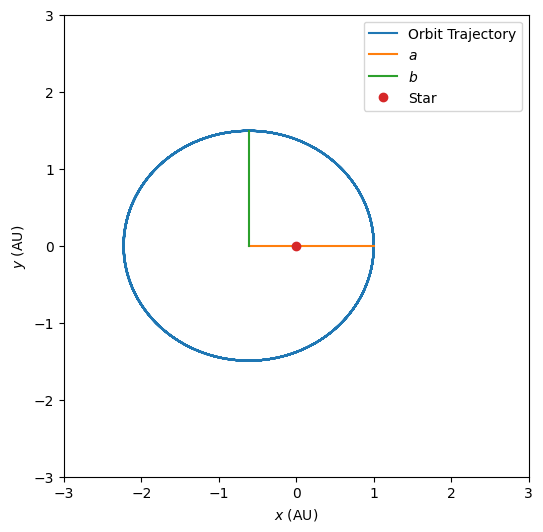

In [362]:
# Plot the orbit
fig, ax = plt.subplots(figsize=[6, 6])
ax.plot(x / AU, y / AU, label='Orbit Trajectory')

# Add the semi-minor/major axes as a check
ax.plot([x.max() / AU - a, x.max() / AU], [0.0, 0.0], label='$a$')
ax.plot([x.max() / AU - a, x.max() / AU - a], [0.0, b], label='$b$')

ax.plot([0.0], [0.0], 'o', label='Star')
ax.set(xlabel='$x$ (AU)', ylabel='$y$ (AU)', xlim=[-3, 3], ylim=[-3, 3])
ax.legend()
plt.savefig('./kepler_example_orbit.pdf')
plt.show()

We used this reference: https://pyproblems.github.io/book/mech3Q.html

# Homework problem! Project 3: Varying Mass, Rocket Problem. Let's go to the moon!

<p align="center">
  <img width="400" src="https://airandspace.si.edu/sites/default/files/images/editoral-stories/thumbnails/hidden-figures-poster.jpg">
</p>

## Who's that rocket??




<p align="center">
  <img width="400" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Apollo_11_Launch_-_GPN-2000-000630.jpg/1200px-Apollo_11_Launch_-_GPN-2000-000630.jpg">
</p>



You, guessed it! It's the Saturn V rocket. (Used for the Apollo missions)

Getting something to leave Earth's gravity is very difficult. However, we can calcaulte how to do it! Our forces at play are

$$\begin{align}
\bar{F}_{net} = \bar{F}_{thrust} +\bar{F}_{drag}+ \bar{F}_{gravity}
\tag{6}
\end{align}$$

or

$$\begin{align}
m(t)\frac{d\bar{v}}{dt} = \bar{F}_{T}(t) +\bar{F}_{D}(|\bar{v}|)+ \bar{F}_{G}(\bar{r},t)
\tag{7}
\end{align}$$

Thrust:

$$\begin{align}
\bar{F}_{T}(t) =  -g_0 I_{sp} \frac{d m}{dt} \hat{v} (t<I_{sp})
\tag{7}
\end{align}$$

Drag:

$$\begin{align}
\bar{F}_{D}(|\bar{v}|) = -\beta |\bar{v}|^2 \hat{v}
\tag{7}
\end{align}$$


Gravitational:

$$\begin{align}
\bar{F}_{G}(\bar{r},t) = m(t) \: g(r)\cdot \hat{r}
\tag{7}
\end{align}$$

Where (under the assumption that the burning rate of fuel is constant)

$$\begin{align}
g(\bar{r}) = \frac{G\: M_E}{|r|^2}
\tag{7}
\end{align}$$

$$\begin{align}
m(t) = m_0 - t\cdot \frac{d m}{dt}  
\tag{7}
\end{align}$$

$$\begin{align}
\frac{d m}{dt} = \frac{|\bar{F}_{thrust}|}{g_0\cdot I_{sp}}
\tag{7}
\end{align}$$

#Task: Solve the rocket eqution using "Radau" in solve_ivp

In [363]:
def Rocket(t,X):
  m0 = 10 #kg
  b = 0.2 * 5**2#30 #kg/m
  G = 6.674e-11 #N*m^2/kg^2
  RE = 6371000.0 #m
  ME = 5.972e24 #Kg
  g0 = 9.81 #m/s^2

  #Thrust and Velocity of Fuel Expulsion
  Ft = 560000 #N
  Isp = 304 #s
  c = g0*Isp #m/s

  # TODO: unpack X
  x, y, vx, vy, m = X
  r = np.sqrt(x**2 + y**2)
  rhatx = x/r
  rhaty = y/r
  vhatx = vx/np.sqrt(vx**2 + vy**2)
  vhaty = vy/np.sqrt(vx**2 + vy**2)

  # functions
  mass = m0 - t * Ft * 1/(g0 * Isp)
  g = G * ME * 1/(r **2)

  # If still have fuel left (at t=1 all fuel is expelled)
  if t<Isp:

    #TODO: fill in the below
    dmdt = -Ft/c
    dxdt = vx
    dydt = vy
    dvxdt = (-g0 * Isp * dmdt * vhatx * 1/mass) + (-b * vx ** 2 * vhatx * 1/mass) + (mass * g * rhatx * 1/mass)
    dvydt = (-g0 * Isp * dmdt * vhaty * 1/mass) + (-b * vy ** 2 * vhaty * 1/mass) + (mass * g * rhaty * 1/mass)

    #Hint for the dvydt and dvxdt: dvdt = -g*T0/vg - 1/(m0*z(t,n))*v**2 *np.sign(v) - 1/z(t, n) * dzdt(t, n)

  # If out of fuel
  else:

    dxdt = vx
    dydt = vy
    dvxdt = (-b * vx ** 2 * vhatx * 1/mass) + (mass * g * rhatx * 1/mass)
    dvydt = (-b * vy ** 2 * vhaty * 1/mass) + (mass * g * rhaty * 1/mass)
    dmdt = 0

    #Hint for the dvydt and dvxdt: dvdt = -g*T0/vg - 1/(m0*z(t,n))*v**2 *np.sign(v) - 1/z(t, n) * dzdt(t, n)

  # If accelerating downwards with negative speed while on the ground (can't go through ground)

  if( np.dot(np.array([dvxdt,dvydt]),np.array([x,y])) <0 ):
    dxdt=0
    dvdt=0
  return [dxdt,dydt,dvxdt,dvydt,dmdt]

In [364]:
tspan = np.linspace(0, 5000, 1000)
RE = 6371000.0 #m
x0 = 0.0
y0 = 1+RE
vx0 = 1
vy0 = 0.5
m0 = 46760
X0 = [x0,y0,vx0,vy0, m0]

# TODO: Solve differential equation using solve_ivp
#(add code, [#add code], X0, t_eval=#add code, rtol = 1e-5, method='Radau')
sol = solve_ivp(Rocket, [0, 5000], X0, rtol=1e-5, method="Radau")

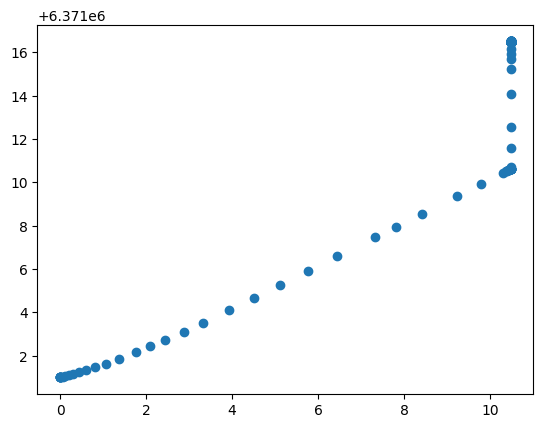

In [365]:
plt.scatter(sol.y[0],sol.y[1])
plt.show()